In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### How does the code perform?

In [2]:
pf = pd.read_csv('perf.csv')
pf = pf[['nlines','processed_time']]

In [3]:
# linear fit
lm = np.polyfit(pf.nlines, pf.processed_time, 1)
lm

array([  2.57848333e-05,   3.17044523e-02])

In [4]:
# get predicted val
x = np.arange(0,510000,100000)
y = x*lm[0] + lm[1]

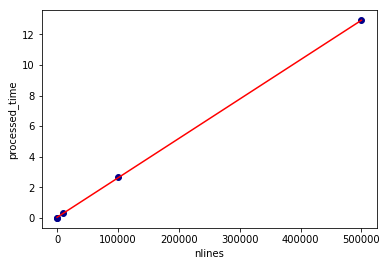

In [5]:
# how good the fit
pf.plot.scatter(x='nlines', y='processed_time',  c='DarkBlue', s=35)
plt.plot(x, y, '-', c='Red')

The performance scales linearly.

One can also split a large file into many smaller files, process them in parallel and distributed way.

### Discover drug

In [6]:
df = pd.read_csv('top_cost_drug-500k.txt')

In [7]:
df.head()

,drug_name,num_prescriber,total_cost
0,HARVONI,135,1.503435e+08
1,CRESTOR,2766,5.272927e+07
2,REVLIMID,147,5.111972e+07
3,LANTUS SOLOSTAR,2068,4.904834e+07
4,SPIRIVA,2176,4.790845e+07


In [8]:
df[df['num_prescriber'] < 1]

,drug_name,num_prescriber,total_cost


In [9]:
# add a var
df['avg_cost'] = df.total_cost / df.num_prescriber

#### Which one is the most costly

In [10]:
df.sort_values('total_cost', ascending=False).head(5)

,drug_name,num_prescriber,total_cost,avg_cost
0,HARVONI,135,1.503435e+08,1.113655e+06
1,CRESTOR,2766,5.272927e+07,1.906337e+04
2,REVLIMID,147,5.111972e+07,3.477532e+05
3,LANTUS SOLOSTAR,2068,4.904834e+07,2.371777e+04
4,SPIRIVA,2176,4.790845e+07,2.201675e+04


In [11]:
x=df.head(10)[['drug_name','total_cost']].sort_index(ascending=False)
x

,drug_name,total_cost
9,NEXIUM,3.543758e+07
8,LANTUS,3.731856e+07
7,RENVELA,4.059754e+07
6,JANUVIA,4.090811e+07
5,ADVAIR DISKUS,4.659865e+07
4,SPIRIVA,4.790845e+07
3,LANTUS SOLOSTAR,4.904834e+07
2,REVLIMID,5.111972e+07
1,CRESTOR,5.272927e+07
0,HARVONI,1.503435e+08


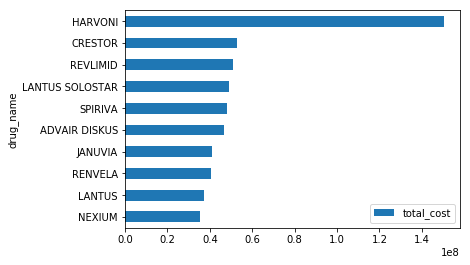

In [12]:
x.plot.barh(x='drug_name',y='total_cost')

##### What is Harvoni?

https://www.drugs.com/harvoni.html

<img src=harvoni.jpg/>

#### Which one is the most popular

In [13]:
x2 = df.sort_values('num_prescriber', ascending=False).head(10)
x2

,drug_name,num_prescriber,total_cost,avg_cost
93,LISINOPRIL,5673,5145472.17,907.010783
87,AMLODIPINE BESYLATE,5530,5499132.33,994.418143
31,ATORVASTATIN CALCIUM,5409,13827391.89,2556.367515
56,OMEPRAZOLE,5157,8627224.19,1672.915298
154,FUROSEMIDE,5095,3050446.12,598.713664
47,GABAPENTIN,5091,9950945.27,1954.615060
33,HYDROCODONE-ACETAMINOPHEN,4987,13659217.23,2738.964754
149,METOPROLOL TARTRATE,4708,3118313.12,662.343483
94,SIMVASTATIN,4596,5090509.68,1107.595666
28,LEVOTHYROXINE SODIUM,4574,14377096.90,3143.221885


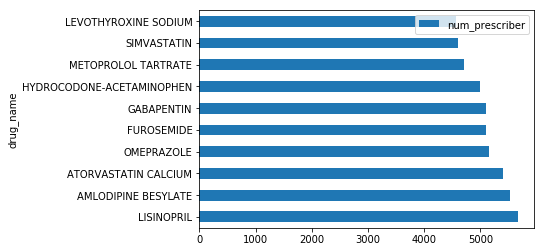

In [14]:
x2.plot.barh(x='drug_name',y='num_prescriber')

##### What is LISINOPRIL?

https://www.drugs.com/LISINOPRIL.html

<img src=LISINOPRIL.jpg/>

#### Which one has the highest average cost?

In [15]:
x3 = df.sort_values('avg_cost', ascending=False).head(10)
x3

,drug_name,num_prescriber,total_cost,avg_cost
188,GAMMAKED,1,2.365574e+06,2.365574e+06
307,MYALEPT,1,1.125671e+06,1.125671e+06
0,HARVONI,135,1.503435e+08,1.113655e+06
148,H.P. ACTHAR,5,3.150904e+06,6.301808e+05
133,SUBSYS,6,3.562756e+06,5.937926e+05
454,VPRIV,1,5.670470e+05,5.670470e+05
18,SOVALDI,41,2.291109e+07,5.588071e+05
178,OLYSIO,5,2.556003e+06,5.112006e+05
344,SOLIRIS,2,9.632377e+05,4.816189e+05
494,RAVICTI,1,4.806375e+05,4.806375e+05


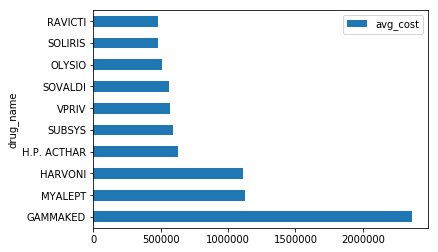

In [16]:
x3.plot.barh(x='drug_name',y='avg_cost')

##### What is GAMMAKED?

http://www.gammaked.com/patients-caregivers/about-gammaked/

<img src="GAMMAKED.jpg"/>